In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# changing display options to increase the number of columns and rows viewable
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df[df["Gender"]=="Male"]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [5]:
female_df = df[df["Gender"]=="Female"]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


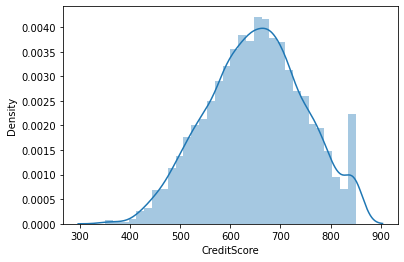

In [11]:
sns.distplot(female_df["CreditScore"])


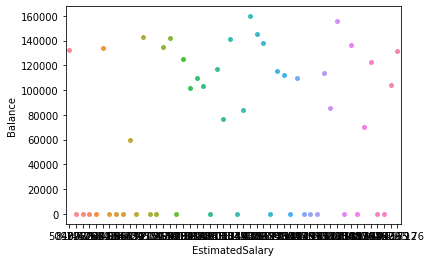

In [18]:
small_df = df[['CustomerId', 'CreditScore', 'Gender', 'Balance', 'EstimatedSalary']]
smaller_df=small_df[small_df["Gender"]=="Male"]
smaller_df=df.head(50)
sns.swarmplot(x="EstimatedSalary", y="Balance", data=smaller_df)

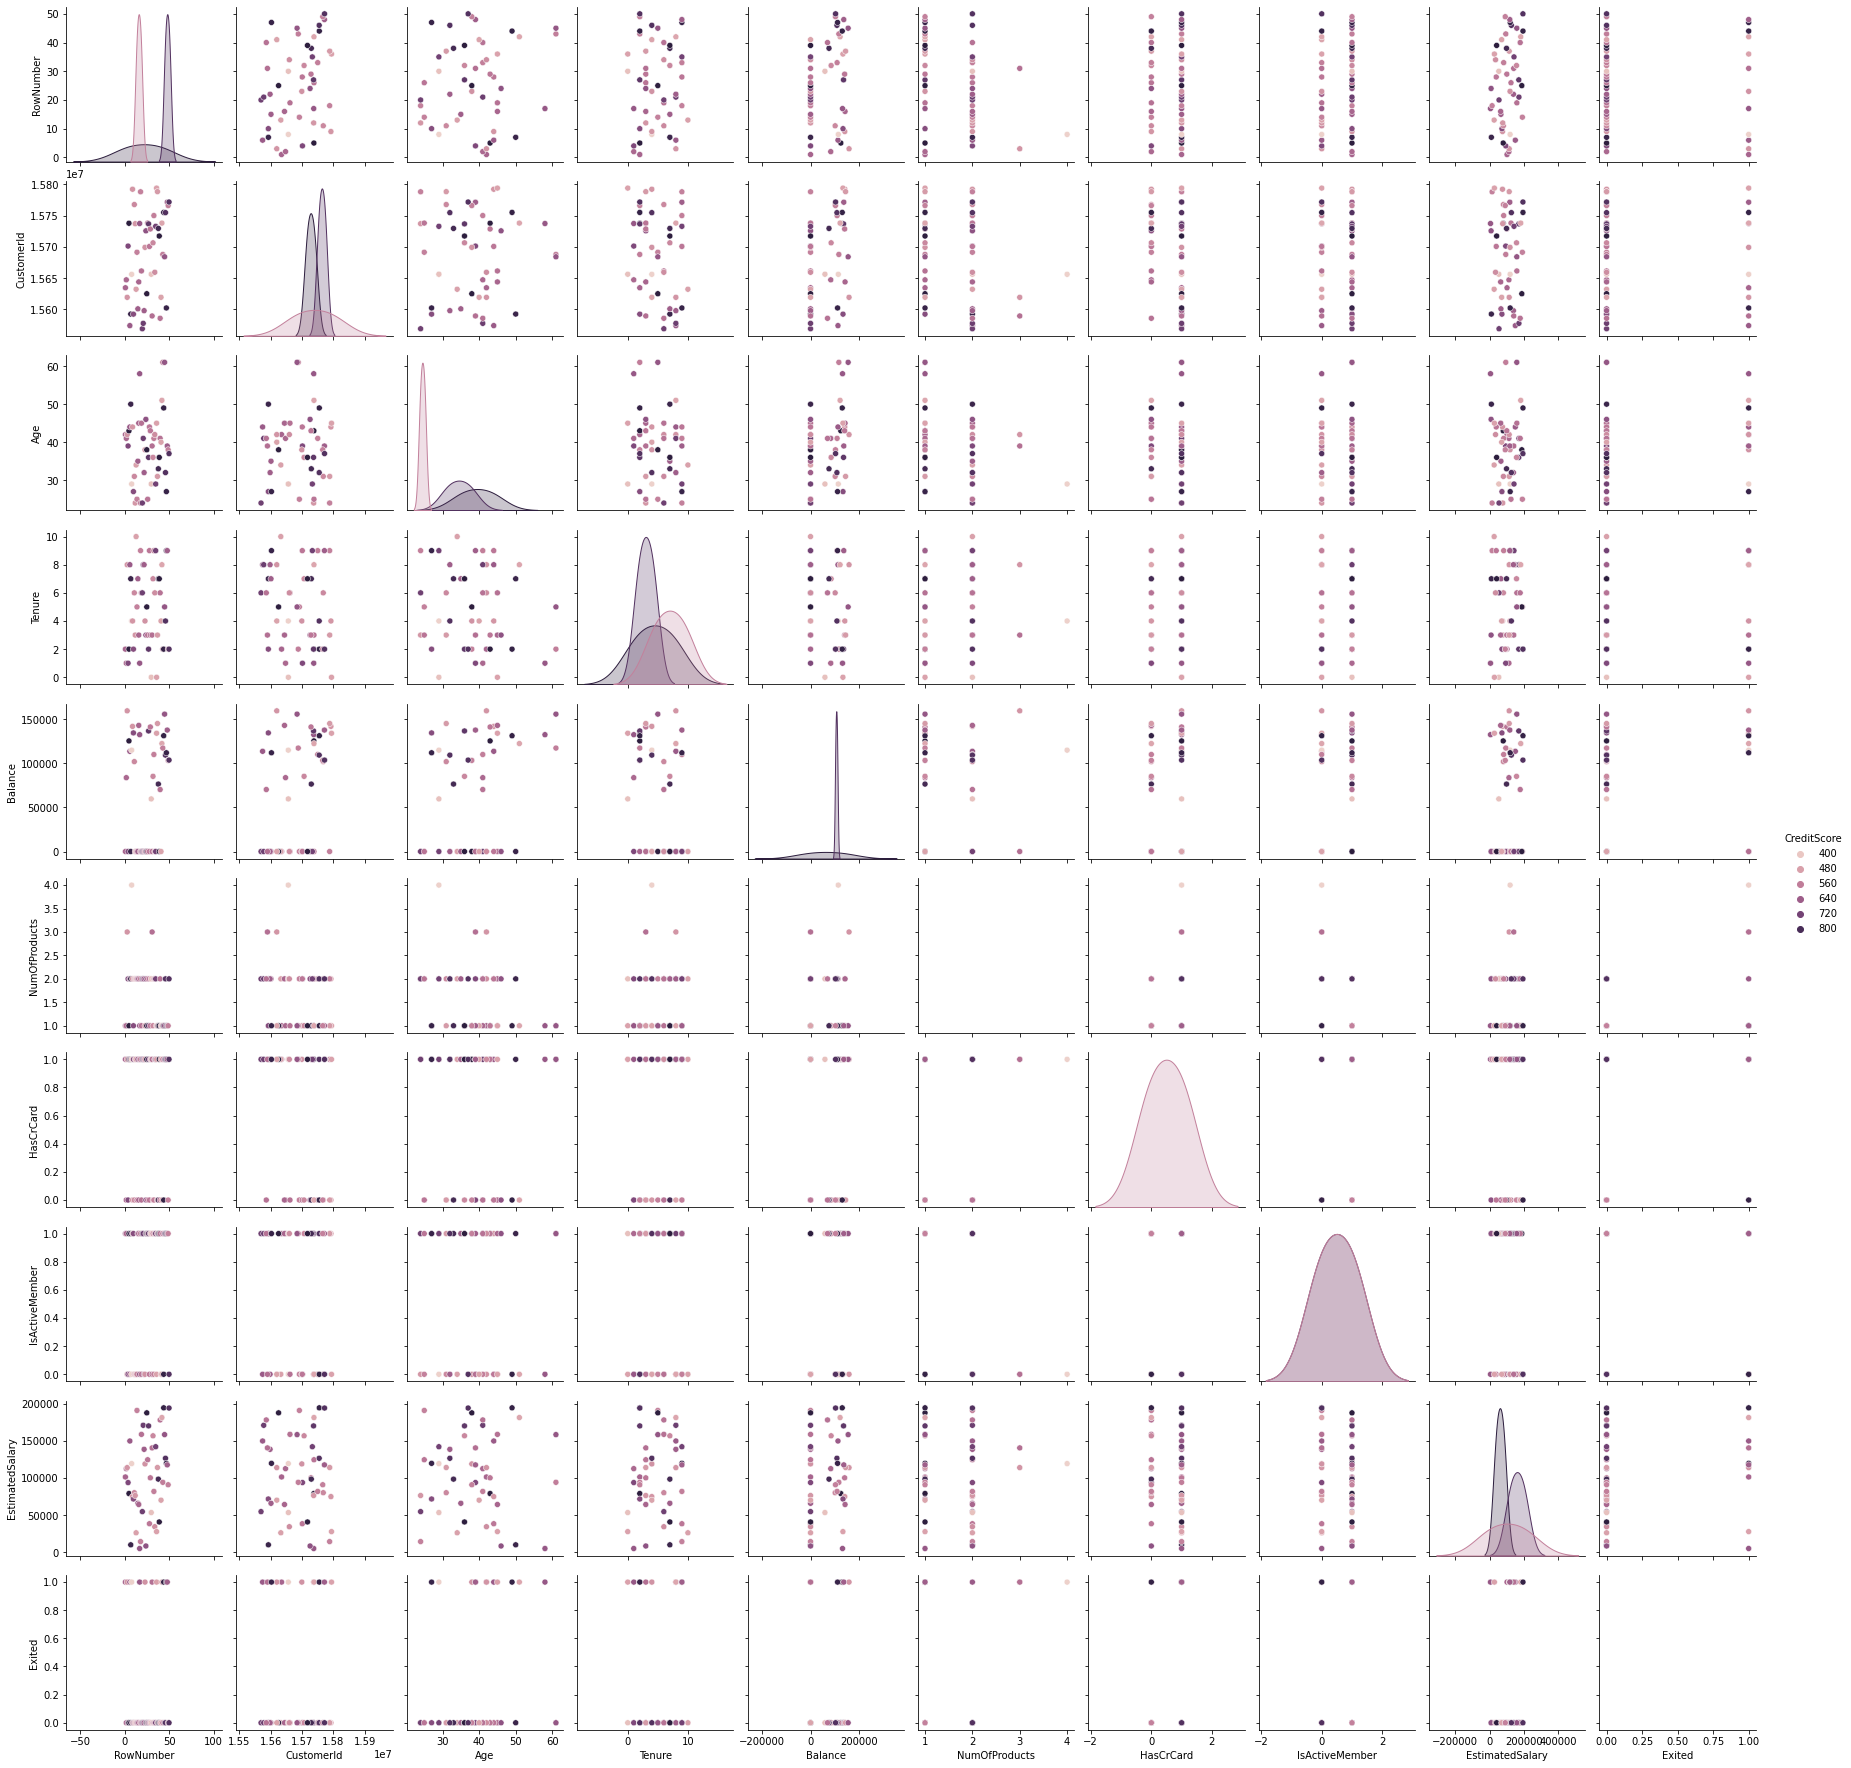

In [19]:
sns.pairplot(smaller_df,hue='CreditScore')

In [20]:
smaller_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,50.00000,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1.568739e+07,621.580000,38.52000,4.880000,66112.666600,1.620000,0.640000,0.600000,102729.417000,0.240000
std,14.57738,6.884229e+04,124.677885,9.01527,2.833041,62210.764277,0.666701,0.484873,0.494872,53936.530426,0.431419
min,1.00000,1.556898e+07,376.000000,24.00000,0.000000,0.000000,1.000000,0.000000,0.000000,5097.670000,0.000000
25%,13.25000,1.562685e+07,529.250000,32.00000,2.250000,0.000000,1.000000,0.000000,0.000000,67002.292500,0.000000
50%,25.50000,1.570004e+07,599.500000,39.00000,4.500000,80178.230000,2.000000,1.000000,1.000000,100768.155000,0.000000
75%,37.75000,1.573808e+07,716.250000,43.75000,7.000000,124763.695000,2.000000,1.000000,1.000000,141642.147500,0.000000
max,50.00000,1.579417e+07,850.000000,61.00000,10.000000,159660.800000,4.000000,1.000000,1.000000,194365.760000,1.000000


In [22]:
median=smaller_df.loc[smaller_df["Tenure"]<3,"Tenure"].median()
smaller_df.loc[smaller_df.Tenure<3,'Tenure']=np.nan
smaller_df.fillna(median,inplace=True)
smaller_df.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,50.00000,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1.568739e+07,621.580000,38.52000,5.020000,66112.666600,1.620000,0.640000,0.600000,102729.417000,0.240000
std,14.57738,6.884229e+04,124.677885,9.01527,2.637949,62210.764277,0.666701,0.484873,0.494872,53936.530426,0.431419
min,1.00000,1.556898e+07,376.000000,24.00000,2.000000,0.000000,1.000000,0.000000,0.000000,5097.670000,0.000000
25%,13.25000,1.562685e+07,529.250000,32.00000,2.250000,0.000000,1.000000,0.000000,0.000000,67002.292500,0.000000
50%,25.50000,1.570004e+07,599.500000,39.00000,4.500000,80178.230000,2.000000,1.000000,1.000000,100768.155000,0.000000
75%,37.75000,1.573808e+07,716.250000,43.75000,7.000000,124763.695000,2.000000,1.000000,1.000000,141642.147500,0.000000
max,50.00000,1.579417e+07,850.000000,61.00000,10.000000,159660.800000,4.000000,1.000000,1.000000,194365.760000,1.000000


In [23]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
#label encoder can't handle missing values
df['Gender'] = df['Gender'].fillna('None')
# Label encode Gender feature
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Print sample of dataset
df.head(100)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,27,2,134603.88,1,1,1,71725.73,0


In [28]:
split_df=df.head(100)
X= split_df.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12]].values

y= split_df.iloc[ : , [10,11,13]].values
print(X)
print(y)

[[1 15634602 'Hargrave' ... 0.0 1 101348.88]
 [2 15647311 'Hill' ... 83807.86 1 112542.58]
 [3 15619304 'Onio' ... 159660.8 3 113931.57]
 ...
 [98 15693683 'Yuille' ... 97086.4 2 197276.13]
 [99 15604348 'Allard' ... 0.0 2 99645.04]
 [100 15633059 'Fanucci' ... 0.0 2 6534.18]]
[[1 1 1]
 [0 1 0]
 [1 0 1]
 [0 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 1]
 [1 1 0]
 [1 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [

In [32]:
from sklearn.preprocessing import MinMaxScaler
split_df=df.head(100)
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(split_df[["CreditScore","Balance","EstimatedSalary"]]))
df_norm

,0,1,2
0,0.512658,0.000000,0.507625
1,0.489451,0.468939,0.564615
2,0.265823,0.893366,0.571687
3,0.681435,0.000000,0.469328
4,1.000000,0.702283,0.394270
5,0.567511,0.636509,0.754081
6,0.940928,0.000000,0.042867
7,0.000000,0.643733,0.599257
8,0.263713,0.794833,0.373174
9,0.649789,0.753163,0.356807


In [35]:
from sklearn.model_selection import train_test_split
split_df=df.head(100)
X= split_df.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12]]
y= split_df.iloc[ : , [10,11,13]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)
X_train


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
93,94,15640635,Capon,769,France,1,29,8,0.00,2,172290.61
16,17,15737452,Romeo,653,Germany,1,58,1,132602.88,1,5097.67
73,74,15779052,Ballard,604,Germany,0,25,5,157780.84,2,58426.81
54,55,15569590,Yoo,601,Germany,1,42,1,98495.72,1,40014.76
95,96,15699461,Fiorentini,515,Spain,1,35,10,176273.95,1,121277.78
53,54,15702298,Parkhill,655,Germany,1,41,8,125561.97,1,164040.94
92,93,15809248,Cole,524,France,0,36,10,0.00,2,109614.57
78,79,15575185,Bushell,757,Spain,1,33,5,77253.22,1,194239.63
13,14,15691483,Chin,549,France,0,25,5,0.00,2,190857.79
7,8,15656148,Obinna,376,Germany,0,29,4,115046.74,4,119346.88
